### Importing libraries

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
# Read data source and directory locations from json file
jsonfile = r'C:/Users/RahulSangamker/jet_engine/json/ad_data_schema_turbofan.json'
json_file = open(jsonfile)
config = json.load(json_file)
input_data = config['train_data_source']
feature_names = ["engine no", "time_cycles", "os1","os2","os3"] + ['S{}'.format(i) for i in range(1, 22)]

data = pd.read_csv(input_data, sep="\s+", header=None, names = feature_names )


data

engine no  time_cycles     os1     os2    os3      S1      S2       S3  \
0              1            1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70   
1              1            2  0.0019 -0.0003  100.0  518.67  642.15  1591.82   
2              1            3 -0.0043  0.0003  100.0  518.67  642.35  1587.99   
3              1            4  0.0007  0.0000  100.0  518.67  642.35  1582.79   
4              1            5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85   
...          ...          ...     ...     ...    ...     ...     ...      ...   
20626        100          196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98   
20627        100          197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50   
20628        100          198  0.0004  0.0000  100.0  518.67  643.42  1602.46   
20629        100          199 -0.0011  0.0003  100.0  518.67  643.23  1605.26   
20630        100          200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38   

            S4     S5  ...     S12      S13      S14     S15   S16  S17   S18  \
0      1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388   
1      1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388   
2      1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388   
3      1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388   
4      1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388   
...        ...    ...  ...     ...      ...      ...     ...   ...  ...   ...   
20626  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03  397  2388   
20627  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03  395  2388   
20628  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03  398  2388   
20629  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03  395  2388   
20630  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03  396  2388   

         S19    S20      S21  
0      100.0  39.06  23.4190  
1      100.0  39.00  23.4236  
2      100.0  38.95  23.3442  
3      100.0  38.88  23.3739  
4      100.0  38.90  23.4044  
...      ...    ...      ...  
20626  100.0  38.49  22.9735  
20627  100.0  38.30  23.1594  
20628  100.0  38.44  22.9333  
20629  100.0  38.29  23.0640  
20630  100.0  38.37  23.0522  

[20631 rows x 26 columns]

In [3]:
data.dtypes

engine no        int64
time_cycles      int64
os1            float64
os2            float64
os3            float64
S1             float64
S2             float64
S3             float64
S4             float64
S5             float64
S6             float64
S7             float64
S8             float64
S9             float64
S10            float64
S11            float64
S12            float64
S13            float64
S14            float64
S15            float64
S16            float64
S17              int64
S18              int64
S19            float64
S20            float64
S21            float64
dtype: object

In [ ]:
data.describe()

###  Histogram analysis of the data

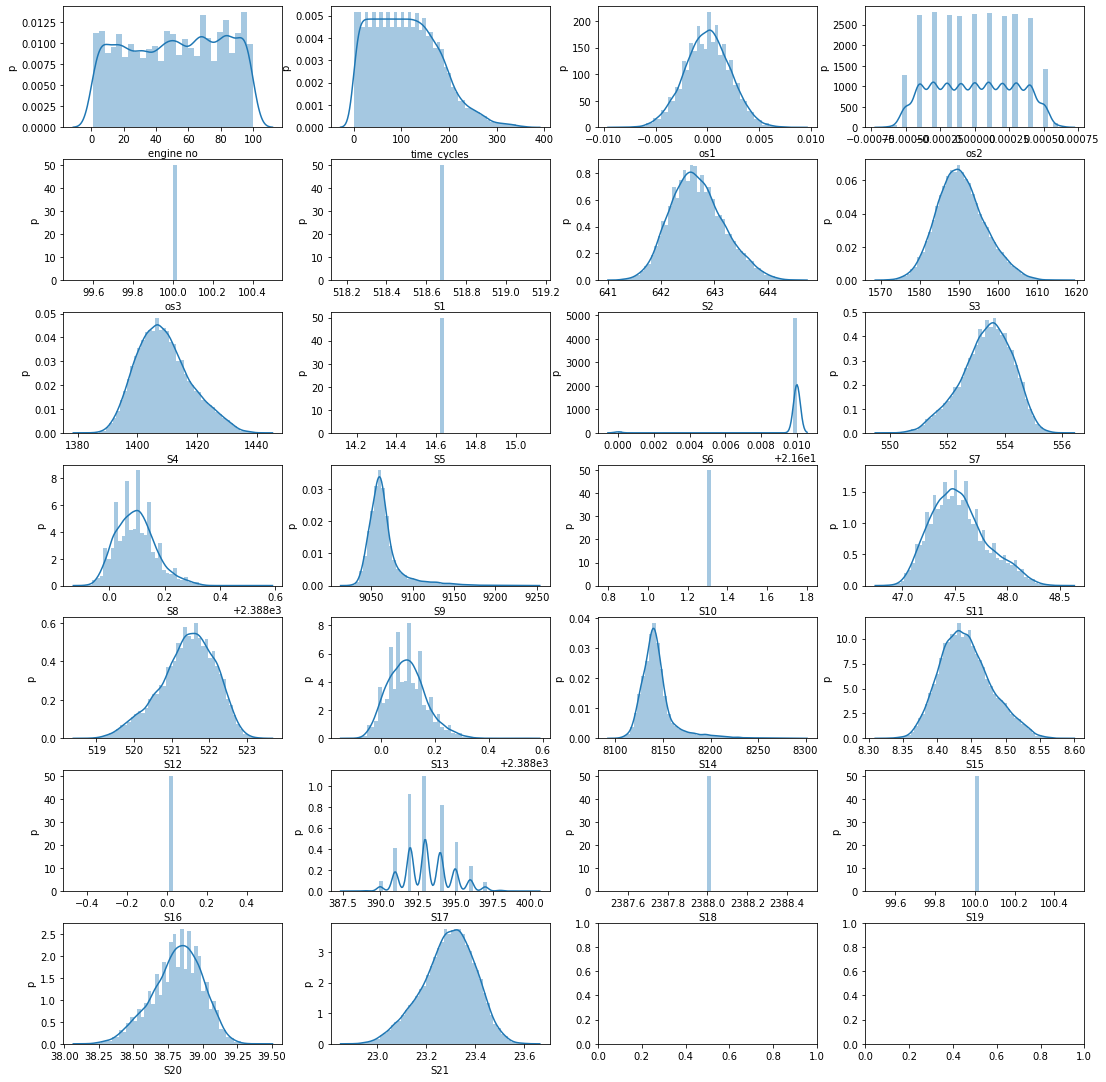

In [47]:
def plot_hists(data):
    """
    This function is used to Create Histograms for the given data
    :param train_data: Input time series DataFrame
    :param indexes: List of index numbers of features
    :return: A 3x3 box plot of the values representing the given
            features.
    """
    cols = data.columns
    n_cols = min(len(cols), 4)
    n_rows = int(np.ceil(len(cols) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,15))
    plt.tight_layout()
    axes = axes.flatten()
    for col, ax in zip(cols, axes):
        sns.distplot(data[[col]], ax=ax, label=col)
        ax.set_xlabel(col)
        ax.set_ylabel("p")
plot_hists(data)

### Plotting the Correlation Matrix

In [41]:
"""
Creating Correlation Matrix. Correlation values range from -1 to +1. 
Values close to -1 imply negative correlation while values close to
1 imply positive correlation. A value close to 0 implies that no 
correlation exists between the fea.

""" 
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# fig, ax = plt.subplots(figsize=(15,12))
# sns.heatmap(data.corr(method = 'pearson'), annot = True,linewidths=.5, fmt = '.2f')

In [49]:
#Printing the most correlated features
corr2 = pd.DataFrame(np.tril(corr.values), columns=corr.columns, index = corr.index)

correlating = []
for col in corr2.columns:
    ser = corr2[col]
    idx = np.logical_or(-0.8 > ser,  ser > 0.8)
    for i, c in zip(ser[idx].index, ser[idx].values):
        if (i, col, c) not in correlating and i != col:
            correlating.append((col, i, c))

print('Highly correlating values:')
for c in correlating:
    print(c)

Highly correlating values:
('S1', 'S5', 1.0)
('S1', 'S10', 1.0)
('S1', 'S16', 1.0)
('S4', 'S11', 0.8301356963159666)
('S4', 'S12', -0.8155905161052416)
('S5', 'S10', 1.0)
('S5', 'S16', 1.0)
('S7', 'S11', -0.8228050249957727)
('S7', 'S12', 0.8127126013254434)
('S8', 'S13', 0.8260843322358152)
('S9', 'S14', 0.9631566003059564)
('S10', 'S16', 1.0)
('S11', 'S12', -0.8468835930051064)


### Analysis with respect to RUL


In [10]:
def add_remaining_useful_life(df):
    '''
    This function adds a column representing
    the remaining useful life for each data
    point corresponding to a particular engine
    in the given dataset. 
    
    :param df: Input time series data frame

    '''   
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="engine no")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='engine no', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(data)
train[feature_names+['RUL']].head()

engine no  time_cycles     os1     os2    os3      S1      S2       S3  \
0          1            1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70   
1          1            2  0.0019 -0.0003  100.0  518.67  642.15  1591.82   
2          1            3 -0.0043  0.0003  100.0  518.67  642.35  1587.99   
3          1            4  0.0007  0.0000  100.0  518.67  642.35  1582.79   
4          1            5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85   

        S4     S5  ...      S13      S14     S15   S16  S17   S18    S19  \
0  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     S20      S21  RUL  
0  39.06  23.4190  191  
1  39.00  23.4236  190  
2  38.95  23.3442  189  
3  38.88  23.3739  188  
4  38.90  23.4044  187  

[5 rows x 27 columns]

### Plotting Sensor data against RUL  
###### Note: We can observe that the sensor data for all the 10 engines generally satisfies the Correlations obtained using the heatmap as shown earlier.

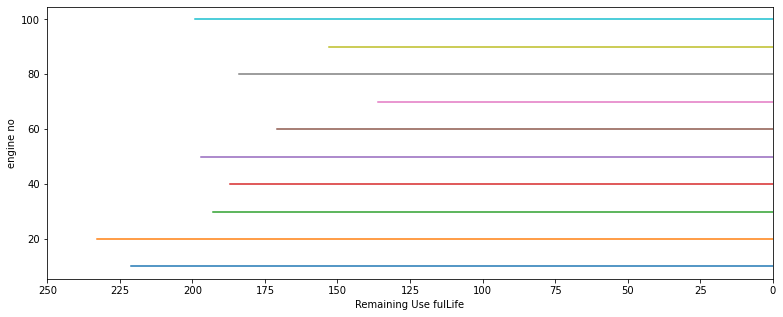

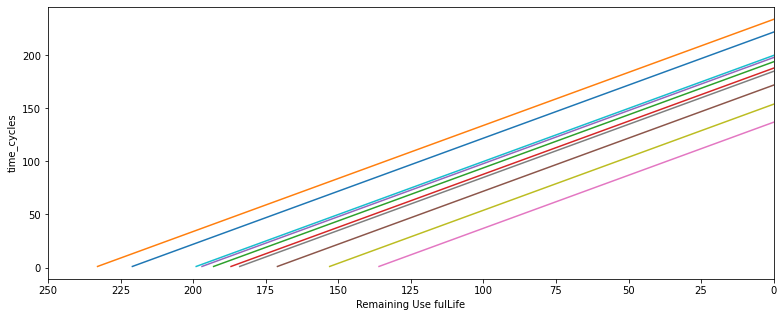

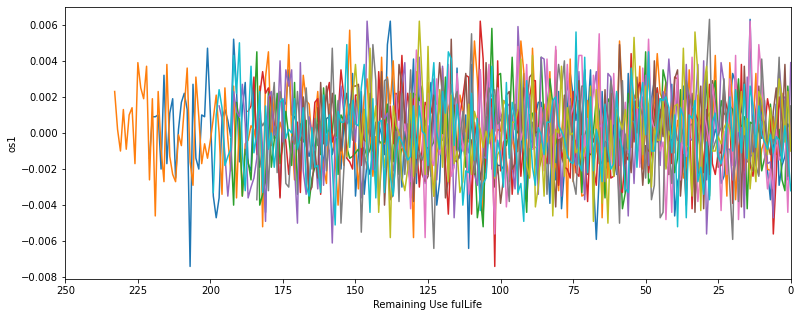

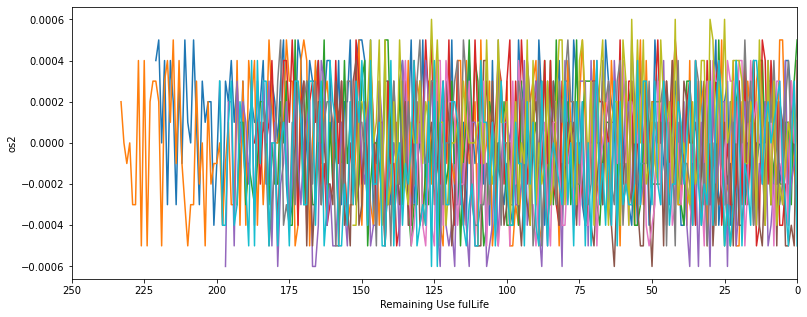

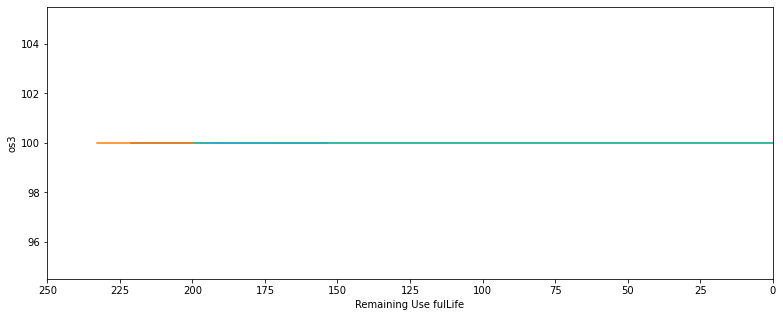

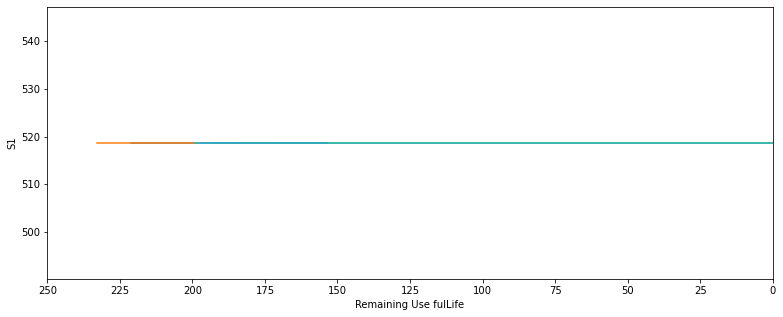

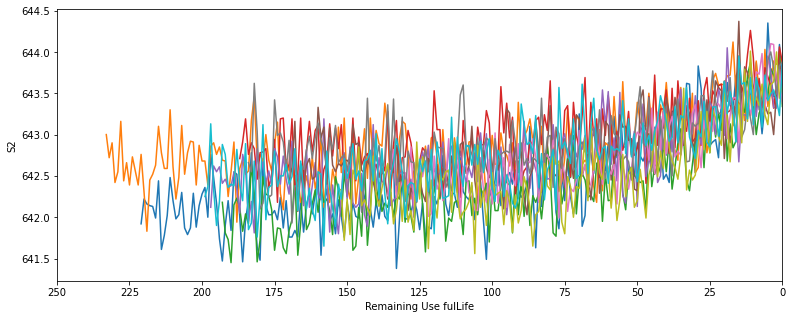

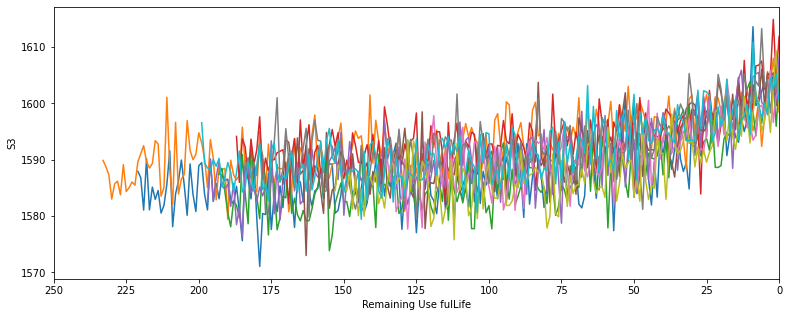

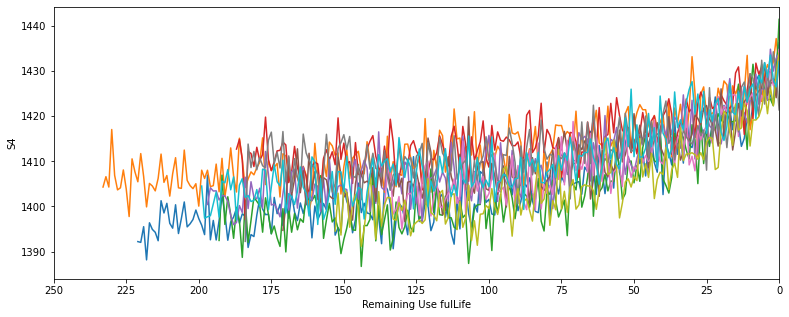

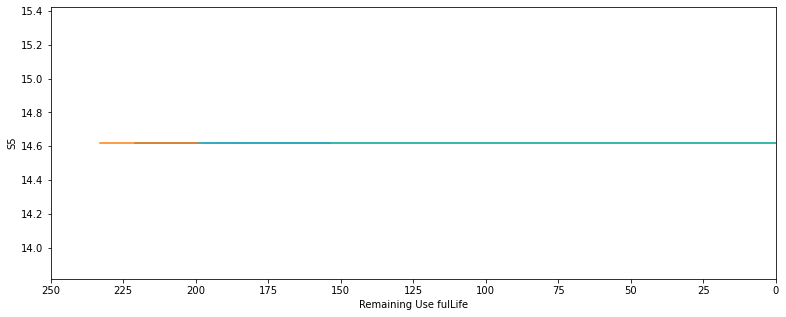

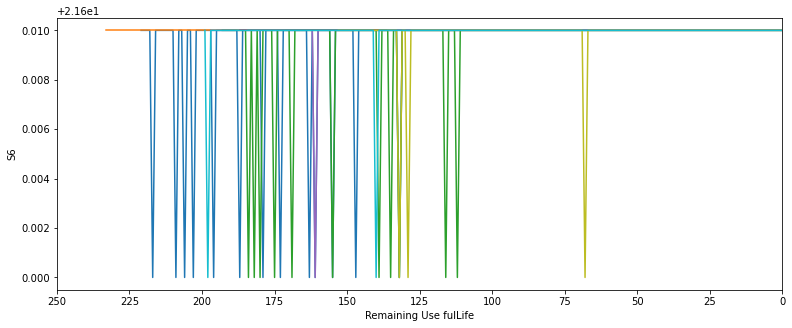

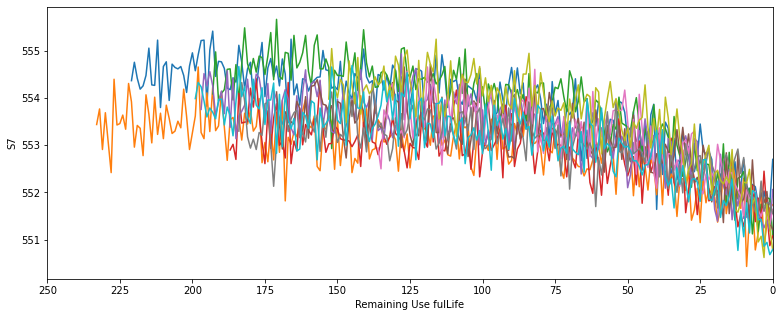

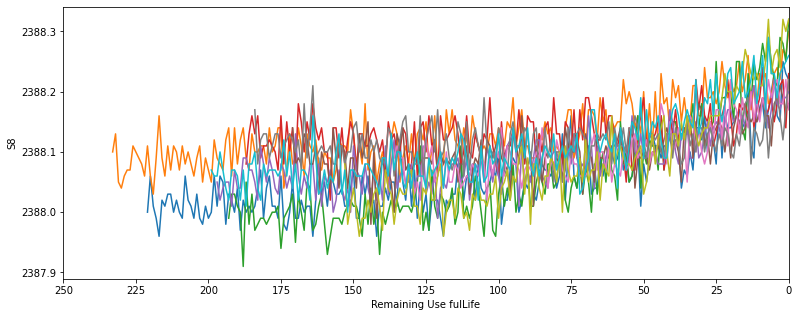

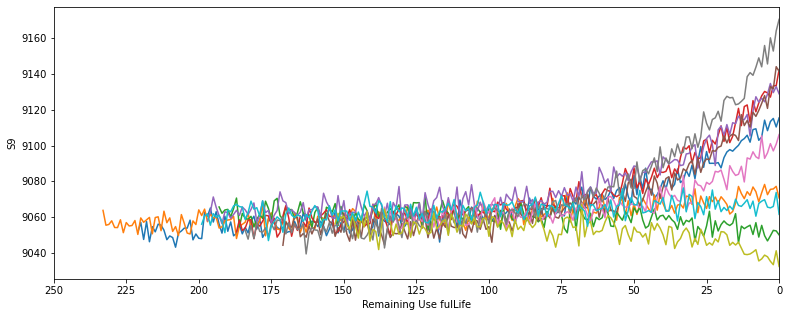

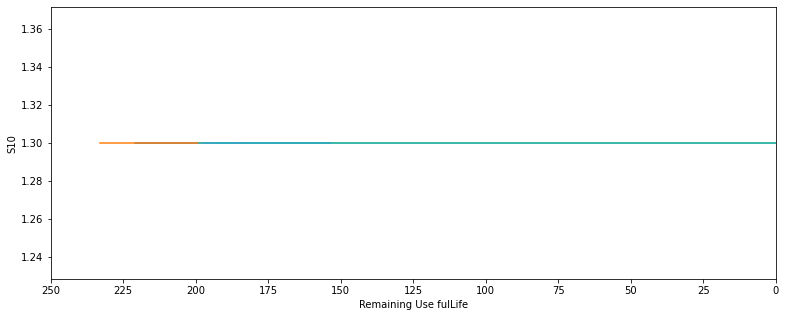

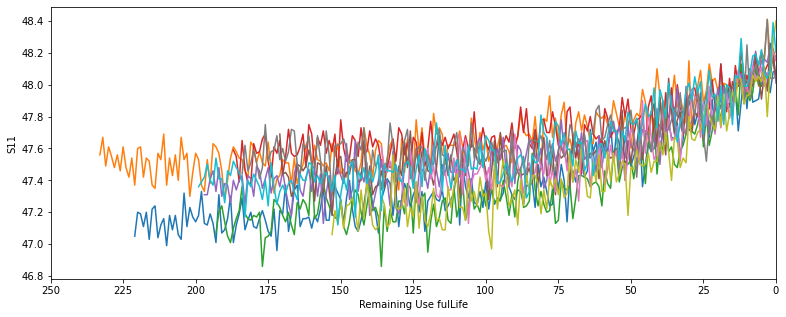

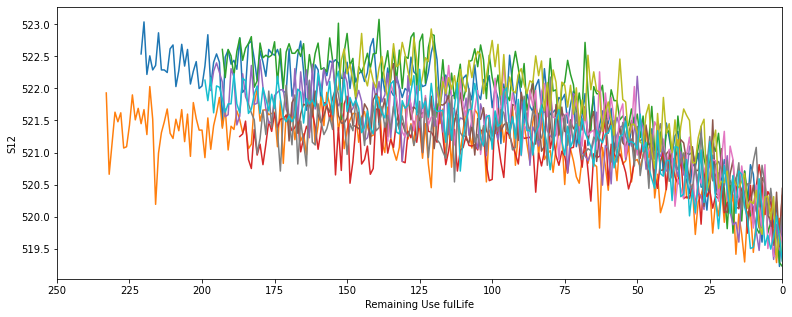

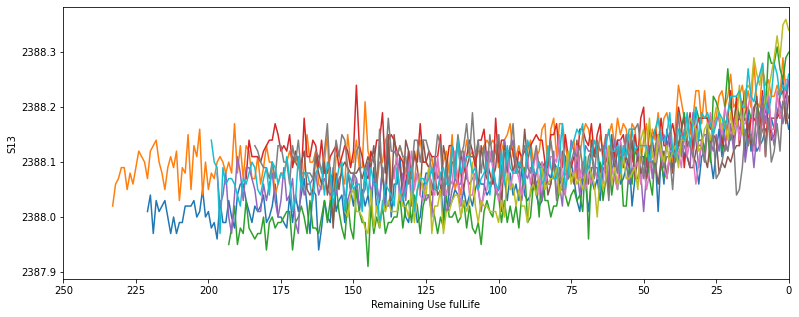

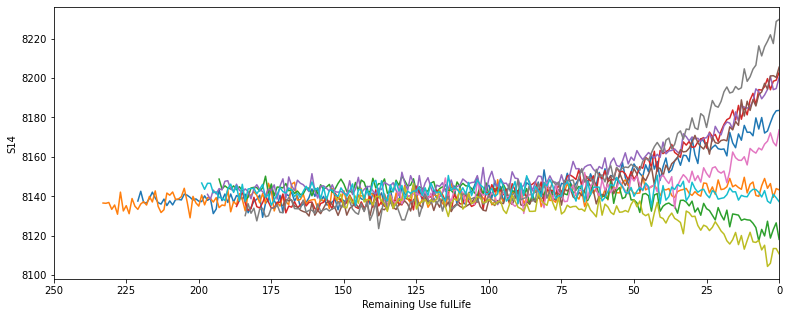

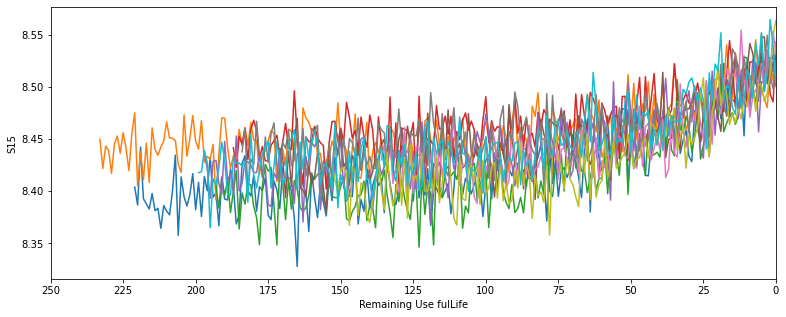

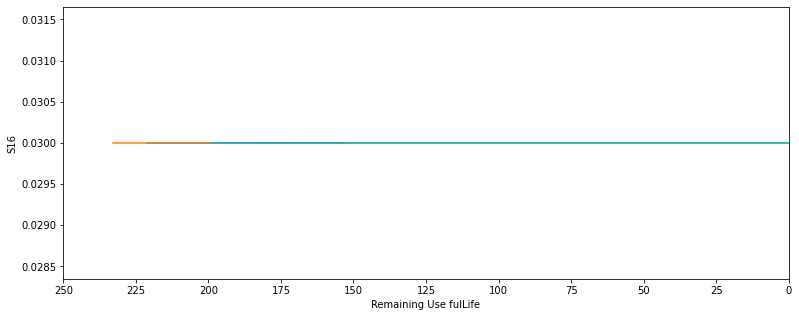

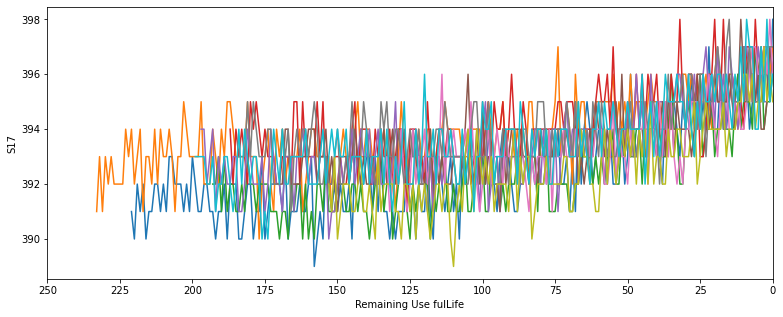

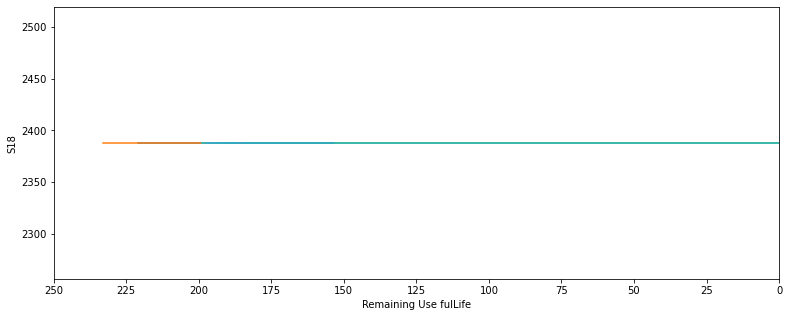

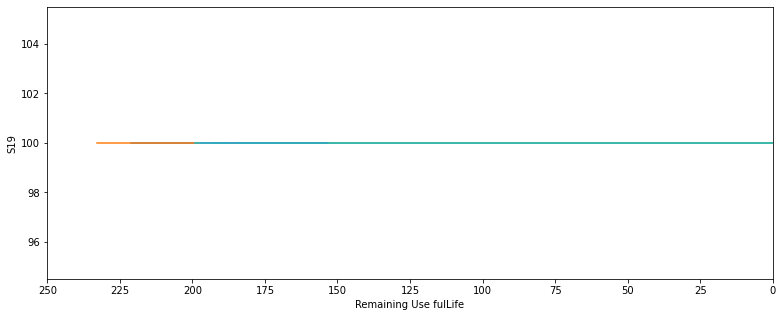

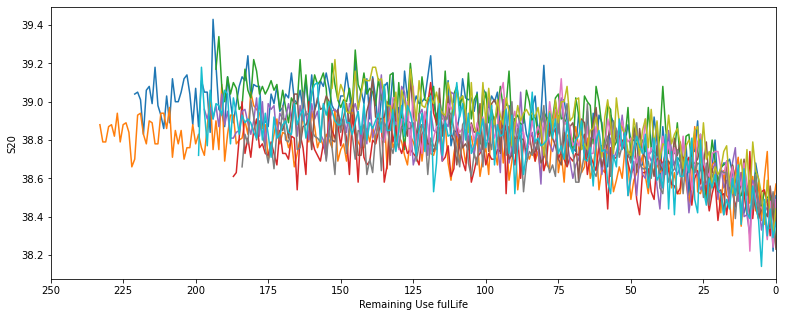

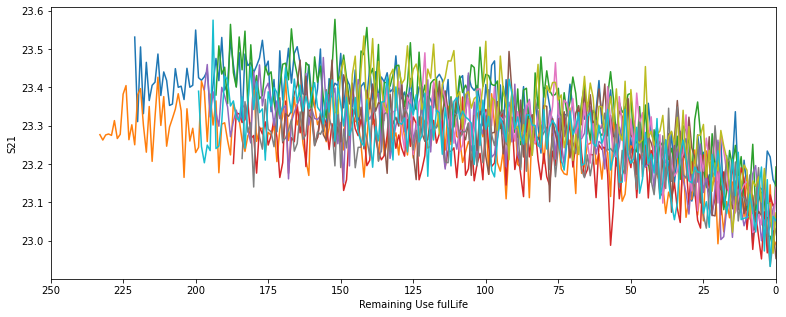

In [11]:
def plot_sensor(data, feature_name):
    '''
    This function is used to plot all the feature data
    against RUL for the given time series data.


    Arguments:
    ---------
    data:                  Standardized input time series dataset

    feature_names:         List of all data column names in time series dataset

'''      
    plt.figure(figsize=(13,5))
    for i in data['engine no'].unique():
        if (i % 10 == 0):  # We plot the data for only 10 engines to make the graphs more readable
            plt.plot('RUL', feature_name, 
                     data=data[data['engine no']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(feature_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()
for feature_name in feature_names:
    plot_sensor(train,feature_name)

### Using PCA to get the most important features which can represent the data 



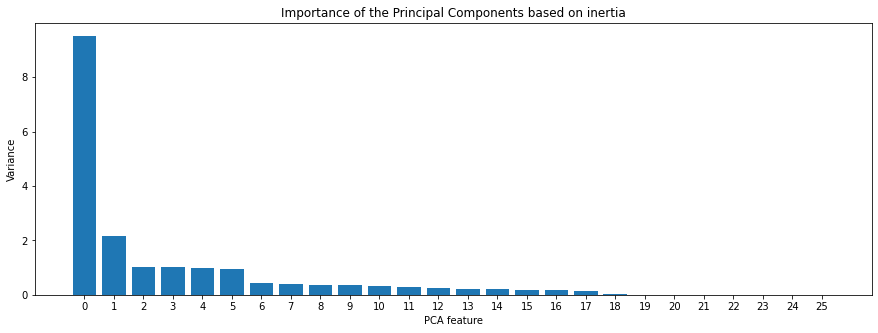


PC1 top 10 features are 



S11    0.300286
S12    0.295140
S4     0.292622
S7     0.289256
S15    0.278802
S21    0.275593
S20    0.274674
S8     0.270553
S13    0.270286
S2     0.265094
Name: PC1, dtype: float64


PC2 top 10 features are 



S14            0.647015
S9             0.622501
S13            0.255968
S8             0.254190
time_cycles    0.193580
S12            0.076356
engine no      0.069659
S7             0.066616
S17            0.060243
S3             0.059634
Name: PC2, dtype: float64

In [12]:
def plot_pca(data, feature_names):
    '''
    This function is used to perform PCA on given data and
    visualize its principal components on the same. It also 
    lists the feature_names and weights of the attributes which 
    contributed the most to the first two Principal Components.

    Arguments:
    ---------
    data:                  Standardized input time series dataset

    feature_names:         List of all data column names in time series dataset
                 
    '''
    names = feature_names
    x = data
    scaler = StandardScaler()
    pca = PCA()
    pipeline = make_pipeline(scaler, pca)
    pipeline.fit(x)
    # Plot the principal components against their inertia
    features = range(pca.n_components_)
    _ = plt.figure(figsize=(15, 5))
    _ = plt.bar(features, pca.explained_variance_)
    _ = plt.xlabel('PCA feature')
    _ = plt.ylabel('Variance')
    _ = plt.xticks(features)
    _ = plt.title("Importance of the Principal Components based on inertia")
    plt.show()

    def create_importance_dataframe(pca, original_num_df):

        # Change pcs components ndarray to a dataframe
        importance_df  = pd.DataFrame(pca.components_)

        # Assign columns
        importance_df.columns  = original_num_df

        # Change to absolute values
        importance_df =importance_df.apply(np.abs)

        # Transpose
        importance_df=importance_df.transpose()

        # Change column names again

        ## First get number of pcs
        num_pcs = importance_df.shape[1]

        ## Generate the new column names
        new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

        ## Now rename
        importance_df.columns  =new_columns

        # Return importance df
        return importance_df

    # Call function to create importance df
    importance_df  = create_importance_dataframe(pipeline.named_steps['pca'], feature_names)


    # Sort depending on PC of interest

    ## PC1 top 10 important features
    pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
    print(), print(f'PC1 top 10 features are \n')
    display(pc1_top_10_features)

    ## PC2 top 10 important features
    pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
    print(), print(f'PC2 top 10 features are \n')
    display(pc2_top_10_features)
#     return pc1_top_10_features
plot_pca(data, feature_names)


In [13]:
sno = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
s_name = ["TOT_TEMP_FAN", "TOT_TEMP_LPC_OUT", "TOT_TEMP_HPC_OUT", "TOT_TEMP_LPT_OUT",
                         "PSI_FAN_INLET", "TOT_PSI_BYPASS_DUCT", "TOT_PSI_HPC_OUT", "FAN_SPEED", 
						 "CORE_SPEED", "ENGINE_PSI_RATIO", "STAT_PSI_HPC_OUT", "RATIO_FUEL_FLOW_STAT_PSI_HPC_OUT",
                         "CORRECTED_FAN_SPEED", "CORRECTED_CORE_SPEED", "BYPASS_RATIO", "BURNER_FUEL_AIR_RATIO",
                         "BLEED_ENTHALPY", "DEMANDED_FAN_SPEED", "DEMANDED_CORRECTED_FAN_SPEED",
                         "HPT_COOLANT_BLEED", "LPT_COOLANT_BLEED"]  #These represent the actual sensor names for the given data
x_f = dict(zip(sno,s_name))
temp = {}
for i in sno:
    temp[feature_names[i]] = x_f[i]
temp                                     

{'S1': 'TOT_TEMP_FAN',
 'S2': 'TOT_TEMP_LPC_OUT',
 'S3': 'TOT_TEMP_HPC_OUT',
 'S4': 'TOT_TEMP_LPT_OUT',
 'S5': 'PSI_FAN_INLET',
 'S6': 'TOT_PSI_BYPASS_DUCT',
 'S7': 'TOT_PSI_HPC_OUT',
 'S8': 'FAN_SPEED',
 'S9': 'CORE_SPEED',
 'S10': 'ENGINE_PSI_RATIO',
 'S11': 'STAT_PSI_HPC_OUT',
 'S12': 'RATIO_FUEL_FLOW_STAT_PSI_HPC_OUT',
 'S13': 'CORRECTED_FAN_SPEED',
 'S14': 'CORRECTED_CORE_SPEED',
 'S15': 'BYPASS_RATIO',
 'S16': 'BURNER_FUEL_AIR_RATIO',
 'S17': 'BLEED_ENTHALPY',
 'S18': 'DEMANDED_FAN_SPEED',
 'S19': 'DEMANDED_CORRECTED_FAN_SPEED',
 'S20': 'HPT_COOLANT_BLEED',
 'S21': 'LPT_COOLANT_BLEED'}